In [111]:
import cv2
import numpy as np
from numpy.lib.stride_tricks import as_strided
import os
import matplotlib.pyplot as plt

In [112]:
def _pad_with(vector, pad_width, iaxis, kwargs):
    pad_value = kwargs.get('padder', 0)
    vector[:pad_width[0]] = pad_value
    vector[-pad_width[1]:] = pad_value

def _kick(res, sub_shape):
    L = []
    for i in res:
        if i.shape==sub_shape:
            L.append(i)
    return L

def _pad(X, k):
    XX_shape = tuple(np.subtract(X.shape, k.shape) + 1)
    if XX_shape!=X.shape:
        P = np.subtract(X.shape, XX_shape) // 2
        if len(np.unique(P))!=1:
            print('kernel is not square matrix')
        else:
            X_ = np.pad(X, P[0], _pad_with)
    else:
        X_ = np.copy(X)
    return X_


def _view_matrix(X, k):
    H, W = X.shape
    Hk, Wk = k.shape
    view_shape = tuple(np.subtract(X.shape, k.shape) + 1) + k.shape 
    res = []
    for h in range(H):
        for w in range(W):
            res.append(X[h:h+Hk, w:w+Wk]) 
    res_ = np.array(_kick(res, k.shape)).reshape(view_shape) 
    return res_  



In [113]:
dP = './img'
sP = './result'

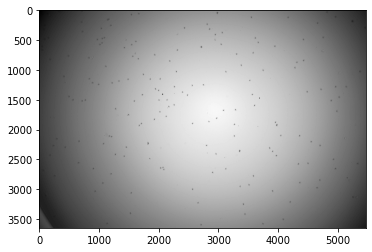

In [114]:
datalist = os.listdir(dP)
img_f = datalist[0]
image_org = cv2.imread(os.path.join(dP, img_f))
image = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')

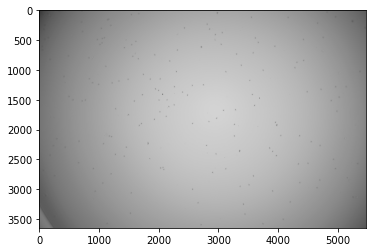

In [132]:
gamma = 0.5
gamma_corrected = np.array(255*(image_org / 255) ** gamma, dtype = 'uint8')

plt.imshow(gamma_corrected, cmap='gray')

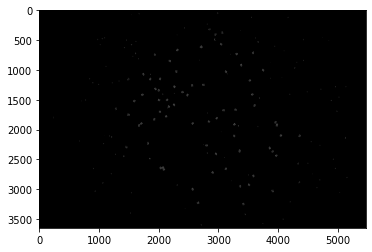

In [127]:
blurred = cv2.GaussianBlur(gamma_corrected, (7,7), 0)
canny = cv2.Canny(blurred, 10, 30)
plt.imshow(canny, cmap='gray')

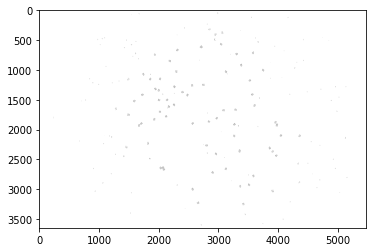

In [136]:
ret, bw_img = cv2.threshold(dilation, 200, 255, cv2.THRESH_BINARY_INV)
plt.imshow(bw_img, cmap='gray')